In [1]:
# 모델 분석에 필요한 라이브러리 import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
import platform

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

# 모듈로 구현한 데이터 분석용 클래스 import 
from DataAnalysis import DataCheck
from DataAnalysis import DataModify
from DataAnalysis import DataPreprocessing
from DataAnalysis import DataVisualize

In [2]:
### matplotlib 에서 한글 및 음수 표현이 깨지는 현상 수정

system = platform.system()

if system == "Windows":     # Windows
    rcParams['font.family'] = 'Malgun Gothic'
elif system == "Darwin":    # macOS
    rcParams['font.family'] = 'AppleGothic'

rcParams['axes.unicode_minus'] = False

### 1. 데이터 로드

In [3]:
### 데이터 로드

input_file_path = './data/Tree_data.csv'

df = pd.read_csv(input_file_path)

### 객체 인스턴스 생성
dc = DataCheck(df)
dp = DataPreprocessing(df)
dv = DataVisualize(df)

### 2. 데이터 구조 및 기초 통계 확인

In [4]:
### 데이터에 대한 정보 출력

dc.print_info()

------ Data Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2783 non-null   int64  
 1   Plot         2783 non-null   int64  
 2   Subplot      2783 non-null   object 
 3   Species      2783 non-null   object 
 4   Light_ISF    2783 non-null   float64
 5   Light_Cat    2783 non-null   object 
 6   Core         2783 non-null   int64  
 7   Soil         2783 non-null   object 
 8   Adult        2783 non-null   object 
 9   Sterile      2783 non-null   object 
 10  Conspecific  2783 non-null   object 
 11  Myco         2783 non-null   object 
 12  SoilMyco     2783 non-null   object 
 13  PlantDate    2783 non-null   object 
 14  AMF          2783 non-null   float64
 15  EMF          1283 non-null   float64
 16  Phenolics    2783 non-null   float64
 17  Lignin       2783 non-null   float64
 18  NSC          2783 non-nul

,No,Plot,Light_ISF,Core,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event
count,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,1283.00000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2782.000000
mean,3914.513834,9.561624,0.085707,2016.648940,20.553069,26.47675,1.933105,15.759792,14.219641,15.282070,53.487244,0.570453
std,2253.515063,5.203659,0.025638,0.477387,12.309587,16.63689,1.969842,6.779607,4.298271,9.166555,32.082942,0.495100
min,3.000000,1.000000,0.032000,2016.000000,0.000000,0.00000,-1.350000,2.230000,4.300000,4.000000,14.000000,0.000000
25%,1971.000000,5.000000,0.066000,2016.000000,13.400000,13.78000,0.170000,10.355000,11.605000,7.000000,24.500000,0.000000
50%,3932.000000,10.000000,0.082000,2017.000000,18.000000,27.72000,0.750000,14.040000,12.660000,13.000000,45.500000,1.000000
75%,5879.000000,14.000000,0.100000,2017.000000,24.445000,35.71000,3.780000,21.115000,17.275000,18.000000,63.000000,1.000000
max,7772.000000,18.000000,0.161000,2017.000000,100.000000,87.50000,6.100000,32.770000,29.450000,33.000000,115.500000,1.000000


##### 데이터 기초 통계 확인 결과
- 작성해야함

### 3. 결측치 및 이상치 탐색

In [5]:
### 범주형 데이터에 대한 컬럼값을 출력하여 문제가 있는지 확인

dc.print_value_counts()

No
continuous
--------------------
Plot
continuous
--------------------
Subplot
A    701
D    666
B    663
C    646
E    107
Name: count, dtype: int64
--------------------
Species
Acer saccharum     751
Prunus serotina    749
Quercus alba       673
Quercus rubra      610
Name: count, dtype: int64
--------------------
Light_ISF
continuous
--------------------
Light_Cat
Med     1474
Low     1005
High     304
Name: count, dtype: int64
--------------------
Core
2017    1806
2016     977
Name: count, dtype: int64
--------------------
Soil
Sterile                  423
Prunus serotina          413
Quercus rubra            402
Acer saccharum           397
Populus grandidentata    391
Quercus alba             381
Acer rubrum              376
Name: count, dtype: int64
--------------------
Adult
continuous
--------------------
Sterile
Non-Sterile    2360
Sterile         423
Name: count, dtype: int64
--------------------
Conspecific
Heterospecific    1974
Sterilized         423
Conspecific        

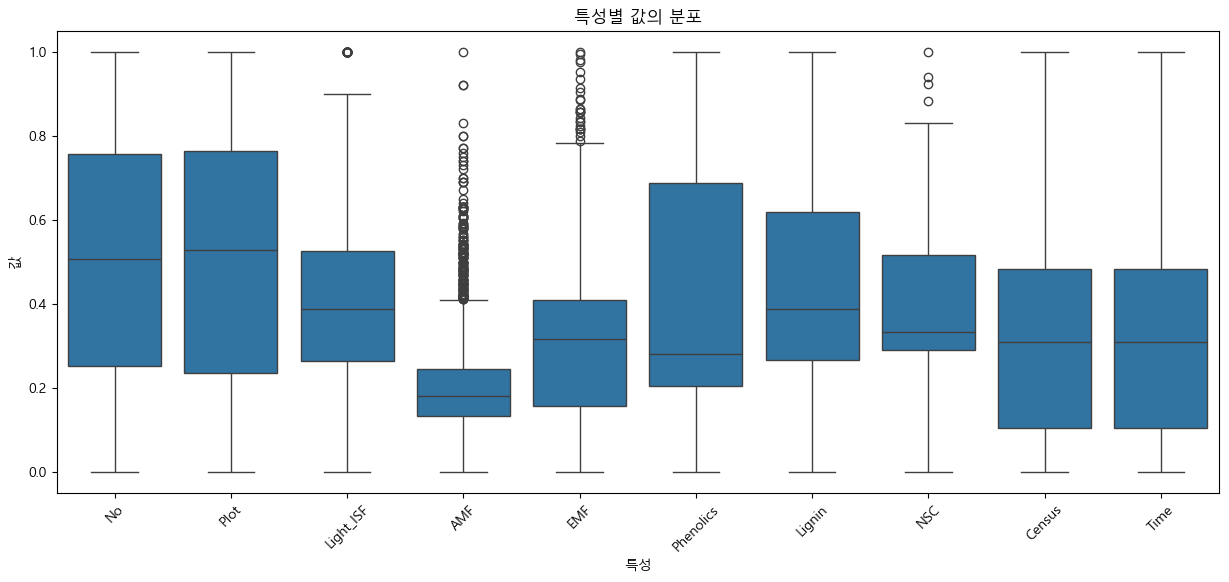

In [6]:
### 연속형 데이터에 대한 컬럼값을 boxplot으로 출력하여 이상치가 있는지 확인

dv.show_boxplot_for_continuous_value()

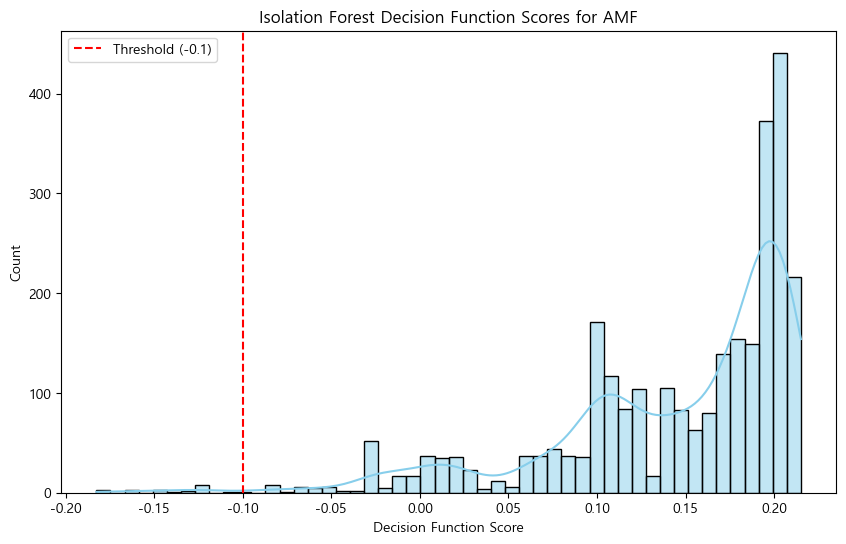

,AMF,IF_score
74,70.0,-0.123643
302,72.0,-0.126157
344,69.0,-0.122640
504,74.0,-0.134260
650,75.0,-0.137321
820,64.0,-0.100036
963,80.0,-0.159626
1053,74.0,-0.134260
1117,73.0,-0.126661
1215,76.0,-0.143996


In [7]:
### boxplot에서 이상치가 확인된 특정 행들에 대해 분포를 확인하고, 이상치가 있는지 확인

anomalies = dv.show_anomaly_score(column='AMF', return_anomalies=True)
display(anomalies)

In [8]:
### 이상치를 확인한 후, 이상치를 제거

df_cleaned, anomalies = DataModify.data_anomaly_edit(df, return_anomaly=True)
display(anomalies)

,Index,Column,Value
0,2781,Alive,NA
1,0,Phenolics,-0.56
2,3,Phenolics,-0.71
3,4,Phenolics,-0.58
4,9,Phenolics,-0.05
...,...,...,...
502,2624,Phenolics,-0.03
503,2663,Phenolics,-0.02
504,2733,Phenolics,-0.63
505,2746,Phenolics,-0.21


##### 확인된 이상치 및 제거 방법
- 작성해야함

### 4. 데이터 시각화를 통한 탐색

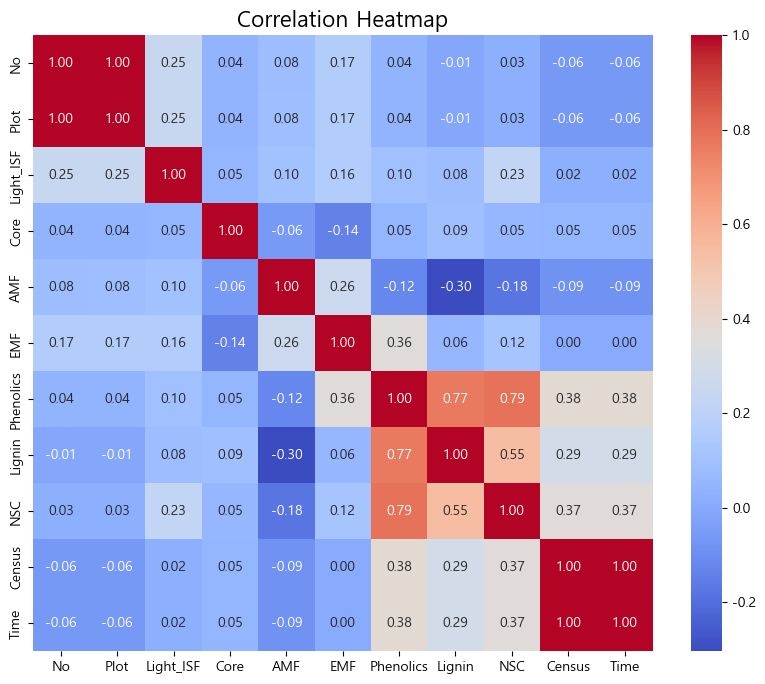

In [ ]:
### 특성 데이터를 분석하기 위해, 라벨 데이터를 병합하고 정제
df_cleaned = dp.merge_label(df_cleaned)

### 숫자값들을 기반으로 correlation 히트맵 출력

dv.show_heatmap_for_continuous_value(df_cleaned)

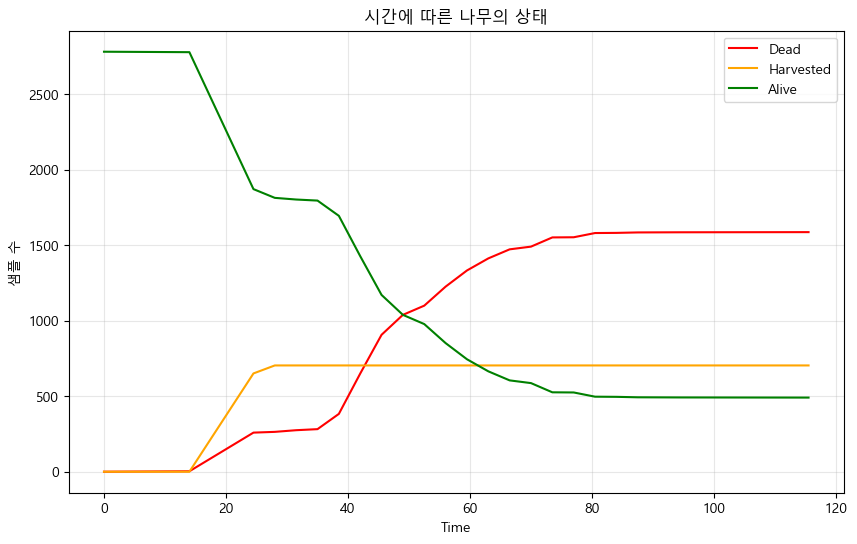

In [ ]:
### 시간 경과에 따른 생존율 출력

dv.show_alive_about_time(df_cleaned)

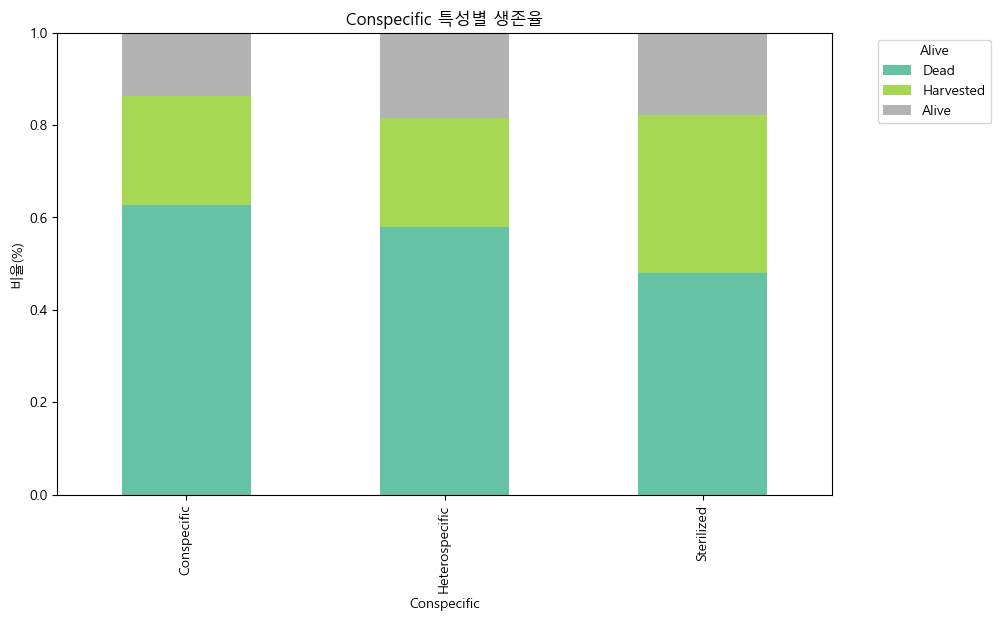

In [ ]:
### 범주형 데이터의 특성값에 따른 생존율 출력

dv.show_survival_ratio(df_cleaned, 'Conspecific')

<Figure size 600x600 with 0 Axes>

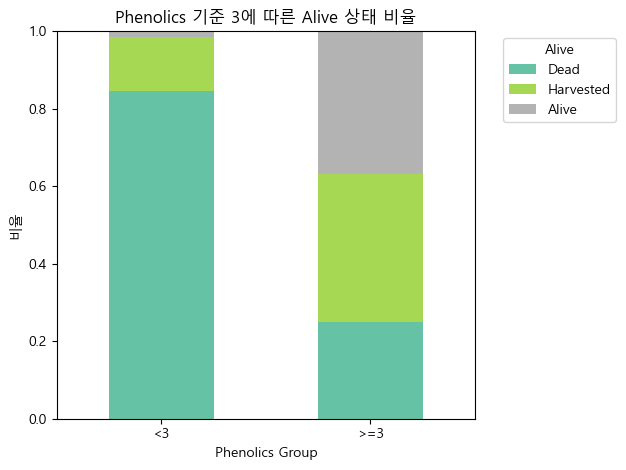

In [ ]:
### 연속형 데이터의 값의 범위에 따른 생존율 출력

dv.show_survival_ratio_with_threshold(df_cleaned, 'Phenolics', 3)

### 5. 데이터 정제 및 전처리

In [ ]:
### 분석 결과를 바탕으로 드랍할 컬럼 설정
drop_cols = ['No', 'Plot', 'Adult', 'Subplot', 'Core', 'Census']
dp.set_drop_cols(drop_cols)

### 전처리 과정 실행 
# (데이터 드랍 -> 이상치 처리 -> 결측치 처리 -> 날짜값 통일 -> 라벨 데이터 통합 -> 인코딩)

encode = dp.run(encoding='label', return_anomaly=False) # return anomaly : 이상치로 판단된 특성들을 확인할 것인지
display(encode)

,Species,Light_ISF,Light_Cat,Soil,Sterile,Conspecific,Myco,SoilMyco,PlantDate,AMF,EMF,Phenolics,Lignin,NSC,Time,Alive
0,0,0.106,0,0,0,0,0,0,0,22.00,0.00,0.79,13.86,12.15,14.0,0
1,1,0.106,0,1,0,0,1,1,1,15.82,31.07,6.54,20.52,19.29,115.5,1
2,2,0.106,0,0,0,0,1,0,1,24.45,28.19,4.71,24.74,15.01,63.0,0
3,0,0.080,0,0,0,0,0,0,0,22.23,0.00,0.64,14.29,12.36,14.0,0
4,0,0.060,1,0,0,0,0,0,0,21.15,0.00,0.77,10.85,11.20,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,1,0.122,2,1,0,0,1,1,1,10.89,39.00,6.88,21.44,18.99,56.0,0
2778,3,0.111,0,3,0,0,0,1,0,40.89,0.00,2.18,9.15,11.88,56.0,0
2779,1,0.118,0,2,0,0,1,0,1,15.47,32.82,6.23,19.01,23.50,56.0,0
2780,1,0.118,0,1,0,0,1,1,1,11.96,37.67,6.86,21.13,19.10,56.0,0
